In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df=pd.read_csv('placement.csv')
df.head(8)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
5,7.30,23.0,1
6,6.69,11.0,0
7,7.12,39.0,1


C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_9524\3403732156.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


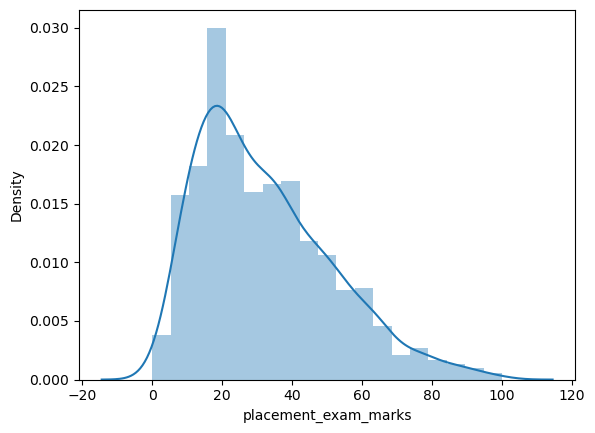

In [7]:
#marks column is skewed
sns.distplot(df['placement_exam_marks'])
plt.show()

In [8]:

df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

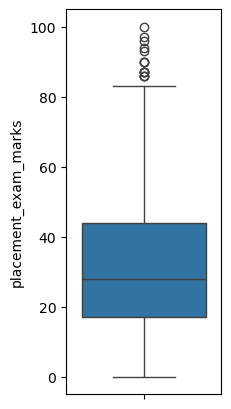

In [13]:
plt.figure(figsize=(2,5))
sns.boxplot(df['placement_exam_marks'])

In [14]:
# to make my life easier,
df.rename(columns={'placement_exam_marks':'marks'},inplace='True')

In [15]:
df.head

<bound method NDFrame.head of      cgpa  marks  placed
0    7.19   26.0       1
1    7.46   38.0       1
2    7.54   40.0       1
3    6.42    8.0       1
4    7.23   17.0       0
..    ...    ...     ...
995  8.87   44.0       1
996  9.12   65.0       1
997  4.89   34.0       0
998  8.62   46.0       1
999  4.90   10.0       1

[1000 rows x 3 columns]>

In [16]:
#:| feeling better
#pheww
per25=df['marks'].quantile(.25)
per75=df['marks'].quantile(.75)

In [17]:
per25

17.0

In [19]:
per75

44.0

In [21]:
iqr = per75-per25
iqr

27.0

In [47]:
#finding maximum and minimum using formulae
upper_limit=per25+1.5*iqr
lower_limit=per75-1.5*iqr

In [48]:
upper_limit

57.5

In [49]:
lower_limit

3.5

In [31]:

upper =df[df['marks'] > upper_limit]
upper

,cgpa,marks,placed
9,7.75,94.0,1
25,6.28,58.0,1
40,6.60,86.0,1
42,7.46,71.0,1
43,7.85,63.0,0
...,...,...,...
966,6.24,72.0,1
967,7.35,59.0,0
987,6.77,62.0,0
994,6.48,63.0,0


In [30]:

lower = df[df['marks'] < lower_limit]
lower

,cgpa,marks,placed
74,6.16,3.0,1
117,7.11,0.0,1
219,5.48,3.0,0
701,6.74,2.0,1
863,8.04,2.0,1
943,7.36,2.0,0


In [51]:

new_df = df[df['marks'] < upper_limit]

In [52]:
new_df

,cgpa,marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
993,6.73,21.0,1
995,8.87,44.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [53]:
new_df = df[(df['marks'] > lower_limit) & (df['marks'] < upper_limit)]


In [54]:
new_df

,cgpa,marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
993,6.73,21.0,1
995,8.87,44.0,1
997,4.89,34.0,0
998,8.62,46.0,1


C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_9524\596124710.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['marks'])
C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_9524\596124710.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['marks'])


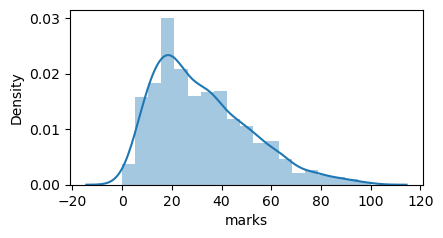

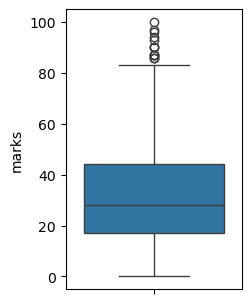

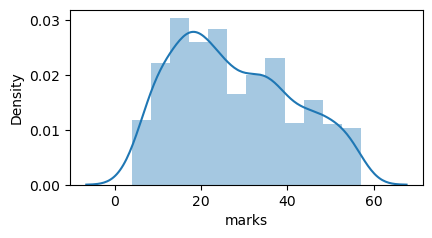

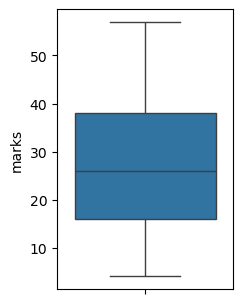

In [63]:

# before and after

plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(df['marks'])

plt.figure(figsize=(5,8))
plt.subplot(2,2,2)
sns.boxplot(df['marks'])

plt.figure(figsize=(10,5))
plt.subplot(2,2,3)
sns.distplot(new_df['marks'])

plt.figure(figsize=(5,8))
plt.subplot(2,2,4)
sns.boxplot(new_df['marks'])

plt.show()

In [64]:
# apparently removing outliers affeted the whole dataset 
df.shape

(1000, 3)

In [65]:
new_df.shape

(880, 3)

In [75]:
change = (1000-880)/100
print(f'trimming affected percentage of data:',change)

trimming affected percentage of data: 1.2


In [76]:
#capping using iqr

In [78]:
cap_df=df.copy()
cap_df['marks']=np.where(
    cap_df['marks']>upper_limit,
    upper_limit,
    np.where(
        cap_df['marks']<lower_limit,
        lower_limit,
        cap_df['marks']
    )
)

In [79]:
cap_df.shape

(1000, 3)

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_9524\147938242.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['marks'])
C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_9524\147938242.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cap_df['marks'])


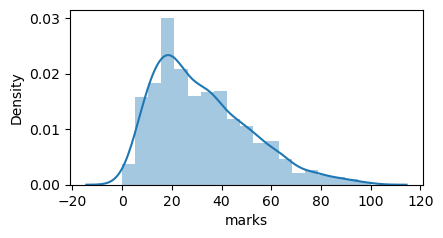

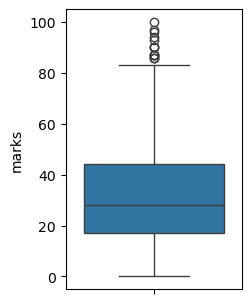

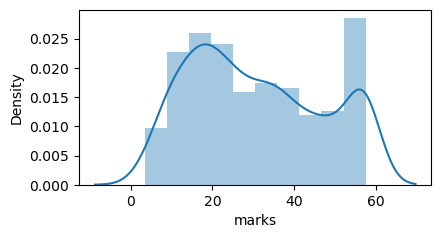

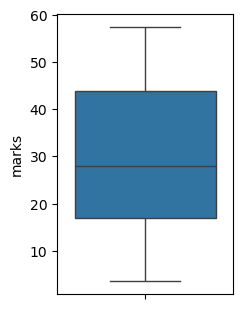

In [80]:


plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(df['marks'])

plt.figure(figsize=(5,8))
plt.subplot(2,2,2)
sns.boxplot(df['marks'])

plt.figure(figsize=(10,5))
plt.subplot(2,2,3)
sns.distplot(cap_df['marks'])

plt.figure(figsize=(5,8))
plt.subplot(2,2,4)
sns.boxplot(cap_df['marks'])

plt.show()

In [81]:
cap_df.shape

(1000, 3)

In [83]:
skew_value = df['marks'].skew()
print("Skewness:", skew_value)

Skewness: 0.8356419499466834


In [84]:
skew_value = cap_df['marks'].skew()
print("Skewness:", skew_value)

Skewness: 0.2786519283622503


In [85]:
# skeweness reduced drastically using capping

In [86]:
skew_value = new_df['marks'].skew()
print("Skewness:", skew_value)

Skewness: 0.34739120769813897


In [88]:
# in trimming skewness do reduced but inter quartile range outlier detection worked dramatically great.